## Homework
> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 


In [627]:
%autosave 0

Autosave disabled


In [628]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
!wget $data -O course_lead_scoring.csv

--2025-10-20 19:53:16--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: 'course_lead_scoring.csv'

     0K .......... .......... .......... .......... .......... 63% 1,73M 0s
    50K .......... .......... ........                        100% 2,88M=0,04s

2025-10-20 19:53:16 (2,03 MB/s) - 'course_lead_scoring.csv' saved [80876/80876]



In [629]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [630]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [631]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [632]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [633]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [634]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
categorical = ['lead_source', 'industry', 'employment_status', 'location']

print(df[numerical].isnull().sum())
print('---------------------------')
print(df[categorical].isnull().sum())

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
dtype: int64
---------------------------
lead_source          128
industry             134
employment_status    100
location              63
dtype: int64


In [635]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [636]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

lead_source
['paid_ads' 'social_media' 'events' 'referral' 'organic_search' nan]
5

industry
[nan 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']
7

number_of_courses_viewed
[1 5 2 3 0 4 6 8 7 9]
10

annual_income
[79450. 46992. 78796. 83843. 85012. 59904. 51283. 62975. 38648. 59866.]
1267

employment_status
['unemployed' 'employed' nan 'self_employed' 'student']
4

location
['south_america' 'australia' 'europe' 'africa' 'middle_east' nan
 'north_america' 'asia']
7

interaction_count
[4 1 3 6 2 0 5 7 9 8]
12

lead_score
[0.94 0.8  0.69 0.87 0.62 0.83 0.57 0.86 0.43 0.92]
101

converted
[1 0]
2



In [637]:
df.shape, len(df)

((1462, 9), 1462)

In [638]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [639]:
df['annual_income'] = df['annual_income'].fillna(0.0)
df[categorical] = df[categorical].fillna('NA')

In [640]:
#verify if NaN values are filled
print('---------------------------')
print(df.isnull().sum())
print('---------------------------')
print(df[numerical].isnull().sum())
print('---------------------------')
print(df[categorical].isnull().sum())

---------------------------
lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64
---------------------------
number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
dtype: int64
---------------------------
lead_source          0
industry             0
employment_status    0
location             0
dtype: int64


In [641]:
df['converted'].isnull().sum()

np.int64(0)

In [642]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

print('Number of records in each dataset:')
print('---------------------------')
print('Training set:', len(df_train))
print('Validation set:', len(df_val))
print('Test set:', len(df_test))  
print('---------------------------')
print('Y train:', len(y_train))
print('Y val:', len(y_val)) 
print('Y test:' , len(y_test))
print('---------------------------')
print('Total Records DF:', len(df))
print('---------------------------')
print('df_train Shape:', df_train.shape)
print('df_val Shape: ', df_val.shape)
print('df_test Shape: ',df_test.shape)
print('y_train Shape:', y_train.shape)
print('y_val Shape: ', y_val.shape)
print('y_test Shape:', y_test.shape)

Number of records in each dataset:
---------------------------
Training set: 876
Validation set: 293
Test set: 293
---------------------------
Y train: 876
Y val: 293
Y test: 293
---------------------------
Total Records DF: 1462
---------------------------
df_train Shape: (876, 8)
df_val Shape:  (293, 8)
df_test Shape:  (293, 8)
y_train Shape: (876,)
y_val Shape:  (293,)
y_test Shape: (293,)


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

In [643]:
from sklearn.metrics import roc_auc_score

In [644]:
# compute ROC AUC for each numerical feature using the training set
for col in numerical:
	scores = df_train[col].values
	auc = roc_auc_score(y_train, scores)
	if auc < 0.5:
		auc = roc_auc_score(y_train, -scores)
		print(f"{col}: {auc:.3f} (inverted)")
	else:
		print(f"{col}: {auc:.3f}")

number_of_courses_viewed: 0.764
annual_income: 0.552
interaction_count: 0.738
lead_score: 0.614


Q1 - Response:
- `number_of_courses_viewed`

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [645]:
# prepare data as lists of dicts
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

# fit DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# train logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# predict probabilities on validation set and compute AUC
y_val_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

print('Validation AUC: {:.3f}'.format(auc))

Validation AUC: 0.817


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745


In [647]:
# calculate precision and recall for different thresholds
thresholds = np.arange(0.0, 1.0, 0.01)

precisions = []
recalls = []

for t in thresholds:
	y_pred = (y_val_pred >= t).astype(int)
	tp = int(((y_val == 1) & (y_pred >= t)).sum())
	fp = int(((y_val == 0) & (y_pred >= t)).sum())
	fn = int(((y_val == 1) & (y_pred < t)).sum())

	precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
	recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

	precisions.append(precision)
	recalls.append(recall)

precisions = np.array(precisions)
recalls = np.array(recalls)

# find threshold where precision and recall are closest (intersection)
idx = np.argmin(np.abs(precisions - recalls))
threshold_intersect = thresholds[idx]

print(f"Threshold where precision and recall intersect (closest): {threshold_intersect:.3f}")


Threshold where precision and recall intersect (closest): 0.980


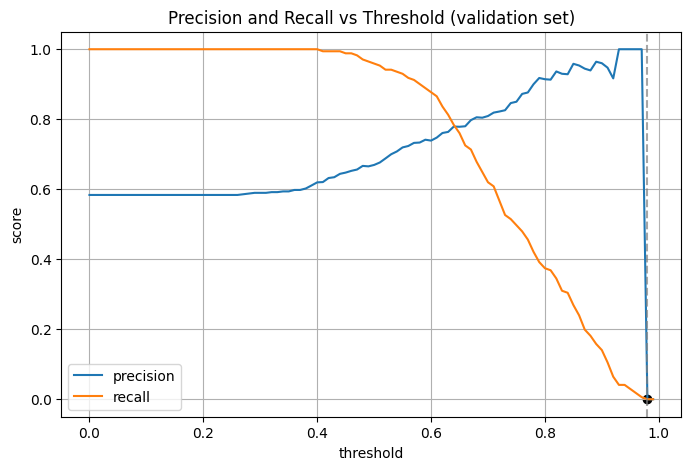

In [648]:
# plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.axvline(threshold_intersect, color='gray', linestyle='--', alpha=0.7)
plt.scatter([threshold_intersect], [precisions[idx]], color='black')
plt.xlabel('threshold')
plt.ylabel('score')
plt.title('Precision and Recall vs Threshold (validation set)')
plt.legend()
plt.grid(True)
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74


In [649]:
# compute F1 for thresholds from 0.0 to 1.0 with step 0.01
# Using y_val and y_val_pred that are already defined in the notebook

thresholds = np.arange(0.0, 1.01, 0.01)

f1_scores = []
precisions = []
recalls = []

for t in thresholds:
	y_pred_t = (y_val_pred >= t).astype(int)

	tp = int(((y_val == 1) & (y_pred_t == 1)).sum())
	fp = int(((y_val == 0) & (y_pred_t == 1)).sum())
	fn = int(((y_val == 1) & (y_pred_t == 0)).sum())

	precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
	recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
	f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

	precisions.append(precision)
	recalls.append(recall)
	f1_scores.append(f1)

f1_scores = np.array(f1_scores)
precisions = np.array(precisions)
recalls = np.array(recalls)

idx_best = f1_scores.argmax()
best_threshold = thresholds[idx_best]

print(f"Best F1: {f1_scores[idx_best]:.3f} at threshold {best_threshold:.2f}")

Best F1: 0.812 at threshold 0.57


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [650]:
from sklearn.model_selection import KFold

# 5-fold cross-validation on df_full_train
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_full_train):
	# prepare train / validation folds
	df_train_f = df_full_train.iloc[train_idx].reset_index(drop=True)
	df_val_f = df_full_train.iloc[val_idx].reset_index(drop=True)

	y_train_f = df_train_f['converted'].values
	y_val_f = df_val_f['converted'].values

	# remove target from features
	del df_train_f['converted']
	del df_val_f['converted']

	# vectorize
	train_dicts = df_train_f.to_dict(orient='records')
	val_dicts = df_val_f.to_dict(orient='records')

	dv = DictVectorizer(sparse=False)
	X_train = dv.fit_transform(train_dicts)
	X_val = dv.transform(val_dicts)

	# train model
	model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
	model.fit(X_train, y_train_f)

	# predict and compute AUC
	y_val_pred = model.predict_proba(X_val)[:, 1]
	auc_score = roc_auc_score(y_val_f, y_val_pred)
	aucs.append(auc_score)

print('AUCs for folds:', aucs)
print('Mean AUC: {:.3f}'.format(np.mean(aucs)))
print('Std AUC:  {:.3f}'.format(np.std(aucs)))

AUCs for folds: [0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]
Mean AUC: 0.822
Std AUC:  0.036


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [651]:
# k-fold cross-validation to find the best C
Cs = [0.000001, 0.001, 1]
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

results = []

for C in Cs:
	aucs = []
	for train_idx, val_idx in kfold.split(df_full_train):
		# prepare train / validation folds
		df_train_f = df_full_train.iloc[train_idx].reset_index(drop=True)
		df_val_f = df_full_train.iloc[val_idx].reset_index(drop=True)

		y_train_f = df_train_f['converted'].values
		y_val_f = df_val_f['converted'].values

		# remove target from features
		del df_train_f['converted']
		del df_val_f['converted']

		# vectorize
		train_dicts = df_train_f.to_dict(orient='records')
		val_dicts = df_val_f.to_dict(orient='records')

		dv = DictVectorizer(sparse=False)
		X_train = dv.fit_transform(train_dicts)
		X_val = dv.transform(val_dicts)

		# train model
		model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
		model.fit(X_train, y_train_f)

		# predict and compute AUC
		y_val_pred = model.predict_proba(X_val)[:, 1]
		aucs.append(roc_auc_score(y_val_f, y_val_pred))

	mean_auc = float(np.mean(aucs))
	std_auc = float(np.std(aucs))
	results.append((C, mean_auc, std_auc))
	print(f"C={C}: mean={mean_auc:.3f}, std={std_auc:.3f}")

# select best C: highest mean, tie-breaker lower std, then smaller C
results_sorted = sorted(results, key=lambda x: (-x[1], x[2], x[0]))
best_C, best_mean, best_std = results_sorted[0]

print()
print("Best C: {}".format(best_C))
print("Mean AUC: {:.3f}, Std AUC: {:.3f}".format(round(best_mean, 3), round(best_std, 3)))

C=1e-06: mean=0.560, std=0.024
C=0.001: mean=0.867, std=0.029
C=1: mean=0.822, std=0.036

Best C: 0.001
Mean AUC: 0.867, Std AUC: 0.029



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one